# First-fit. Code to analyse output for 65 dB input

1 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import shapiro as shapiro

In [2]:
# read BCD output measured on skull simulator with a 65 dB ISTS input signal
def read_output():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/output_BCD_65dB.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    return df

In [3]:
def list_freq():
    data = read_output()
    clmns = data.columns
    l = list()
    for clm in clmns:
        l.append(clm)
    return l

In [4]:
def new_freq():
    l = list_freq()
    l2 = list()
    for s in l:
        s = s.rstrip('_Hz')
        s = s.lstrip('f_')
        f = int(s)
        l2.append(f)
    return l2

In [5]:
def dict_freq():
    l = list_freq()
    l2 = new_freq()
    d = dict()
    #d1 = dict()
    for i in range(len(l)):
        d.update({l[i] : l2[i]})
    #    d1.update({l2[i] : l[i]})
    return d

In [6]:
def show_data():    
    # adjust column names, change format columns labels 'f_Hz' to f
    data = read_output()
    d = dict_freq()
    data = data.rename(columns=d)
    #data = data.drop(columns =[125, 160, 200, 250, 315, 400, 500, 630, 800])
    return data

In [7]:
def calculate_quantiles(df):
    quantiles = [0.10, 0.50, 0.90]
    q = (df.quantile(q=quantiles)).round(1)
    q = q.reset_index()
    diq = {0:'Output BCD on skull sim. P10', 1:'Output BCD on skull sim. P50', 2:'Output BCD on skull sim. P90'} 
    q = q.rename(index=diq)
    q.drop('index', axis=1, inplace=True)
    return q

In [8]:
def descriptive_stat(df):
    # calculate quantiles
    quantiles = df.quantile([0.1, 0.5, 0.9]).round(1)
    quantiles.index = ['P10', 'P50', 'P90']
 
    # calculate mean and standard deviation
    mean_values = (pd.DataFrame({'Mean': df.mean().round(1)})).T
    std_values = (pd.DataFrame({'St. dev.': df.std().round(1)})).T

    # perform Shapiro test 
    sht = shapiro_test_norm(df)

    # combine results into a single DataFrame
    res = pd.concat([quantiles, mean_values, std_values, sht])
    
    return res.round(1)

In [9]:
def shapiro_test_norm(df):
    # check normality with Shapiro-Wilk test
    shapiro_result = df.apply(lambda x: shapiro(x) if len(x) >= 3 else (float('nan'), float('nan')))
    
    shapiro_stats = shapiro_result.apply(lambda x: round(x[0], 3))
    p_values = shapiro_result.apply(lambda x: round(x[1], 3))
    is_normal = p_values >= 0.05
    
    shapiro_test = pd.DataFrame({
        'Shapiro test statistic': shapiro_stats,
        'p-value': p_values,
        'normally distributed': is_normal
    }).transpose()
    
    return shapiro_test

In [10]:
# show tabel with BCD output measured on skull simulator with a 65 dB ISTS input signal
data1 = show_data()
data1

,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
Study_ID,,,,,,,,,,,,,,,,
34,54.4,57.3,62.9,74.8,80.9,79.6,75.2,78.9,81.8,78.6,76.8,76.3,71.7,68.6,67.5,59.1
35,53.8,57.7,65.9,79.7,86.8,87.2,82.9,82.9,86.0,84.0,76.1,71.9,72.2,73.6,73.9,65.0
43,54.3,58.6,66.8,80.9,88.0,88.3,84.5,84.4,84.4,79.8,75.3,75.4,74.2,72.2,69.7,60.3
47,54.7,58.0,65.0,78.8,85.8,86.0,82.2,81.9,80.5,72.9,67.4,70.3,71.7,69.9,67.0,57.4
50,53.9,57.4,67.2,80.6,87.2,87.1,83.0,83.3,82.5,76.2,71.8,73.4,74.0,73.7,72.6,63.2
53,55.0,58.8,68.3,83.7,90.7,90.5,85.5,82.7,79.7,72.0,69.2,70.8,71.1,70.6,69.3,60.0
54,55.8,59.7,69.6,84.5,91.5,91.4,86.5,84.4,82.5,76.5,73.9,74.4,72.4,70.6,69.0,60.0
56,56.9,60.8,69.7,84.9,92.1,92.2,88.3,88.3,87.6,81.8,78.6,79.9,79.0,77.6,75.0,65.3
59,55.2,58.8,69.3,84.0,90.8,90.6,85.7,82.7,79.6,72.7,68.2,70.8,72.3,70.3,66.0,55.9


In [11]:
des_stat = descriptive_stat(data1)
des_stat

,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
P10,53.9,55.8,64.3,79.6,86.7,87.0,82.5,81.3,79.7,72.7,68.7,70.7,69.0,69.6,66.5,56.2
P50,54.4,57.8,67.0,81.4,88.2,88.4,84.6,83.6,82.6,76.7,72.1,73.0,72.7,70.6,69.3,60.0
P90,55.8,59.4,69.5,84.5,91.6,91.4,86.2,86.6,86.2,81.4,76.4,76.3,74.6,73.6,72.7,63.4
Mean,54.7,57.6,66.9,81.4,88.3,88.4,84.2,83.7,83.0,77.3,72.7,73.4,72.7,71.4,69.4,60.2
St. dev.,0.8,1.6,2.0,2.4,2.5,2.7,2.6,2.4,2.8,3.5,3.4,2.7,2.5,2.3,2.7,2.9
Shapiro test statistic,0.909,0.967,0.962,0.927,0.891,0.838,0.807,0.959,0.978,0.961,0.941,0.935,0.94,0.943,0.98,0.962
p-value,0.061,0.69,0.595,0.134,0.028,0.003,0.001,0.521,0.908,0.57,0.249,0.188,0.236,0.268,0.931,0.576
normally distributed,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True


In [12]:
# name file quantiles results
f_ar = "output_firstfit_65dB.csv"

# save quantiles to file
d_ar = "/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Results/"
p_ar = Path(d_ar + f_ar)
des_stat.to_csv(p_ar)

In [13]:
# calculation quantiles
q = calculate_quantiles(data1)

# convert Pandas object in numpy array
lf = new_freq()
frqc = np. array(lf , dtype=int)
p10 = q.iloc[0].T.to_numpy()
median = q.iloc[1].T.to_numpy()
p90 = q.iloc[2].T.to_numpy()
bh5 = data1.T.to_numpy()
len(bh5)

16

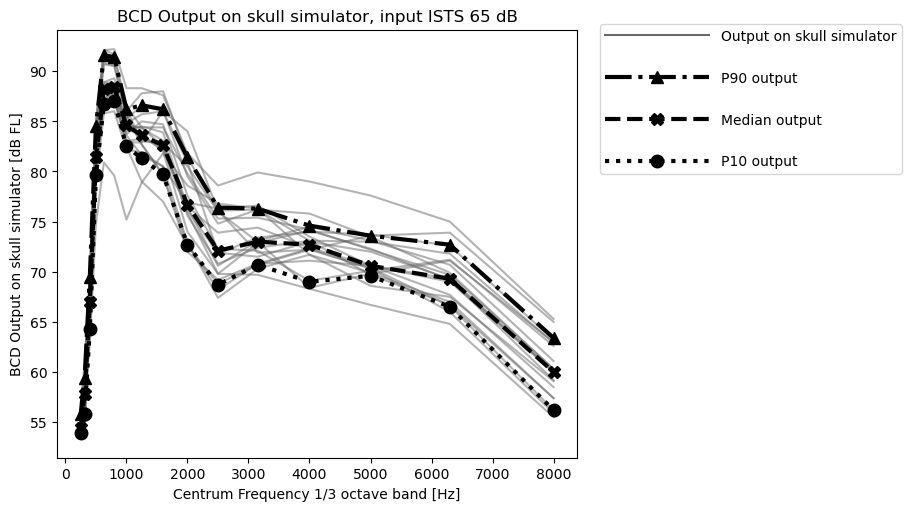

In [14]:
# make a figure to plot BCD output

plt.rcParams['axes.facecolor'] = 'white'

fig, (ax) = plt.subplots(1, constrained_layout=True)

fig.set_figheight(5)
fig.set_figwidth(9)

# make the line plot

ax.set(xlabel='Centrum Frequency 1/3 octave band [Hz]', ylabel='BCD Output on skull simulator [dB FL]',
       title='BCD Output on skull simulator, input ISTS 65 dB')

# plot lines based on numpy arrays
ax.plot(frqc, bh5, color="dimgrey", alpha=0.5, label='Output FL BAHA5P')
ax.plot(frqc, median, color='black', marker='X', linestyle='dashed', linewidth=3, markersize=9)
ax.plot(frqc, p10, color='black', marker='o', linestyle='dotted', linewidth=3, markersize=9)
ax.plot(frqc, p90, color='black', marker='^', linestyle='dashdot', linewidth=3, markersize=9)

# make a legend
leg_line = mlines.Line2D([], [], color="dimgrey", label='Output on skull simulator')

leg_p90 = mlines.Line2D([], [], color='black', marker='^', linestyle='dashdot', 
                            linewidth=3, markersize=9, label='P90 output')
leg_med = mlines.Line2D([], [], color='black', marker='X', linestyle='dashed', 
                            linewidth=3, markersize=9, label='Median output')
leg_p10 = mlines.Line2D([], [], color='black', marker='o', linestyle='dotted', 
                            linewidth=3, markersize=9, label='P10 output')
     
leg = plt.legend(handles=[leg_line, leg_p90, leg_med, leg_p10], 
                 bbox_to_anchor=(1.03, 1.03), loc='upper left', labelspacing=2., handlelength=7.5)

# save the figure
plt.savefig('/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Graphs/output_firstfit_65dB.tiff', 
            transparent=False, dpi=500, bbox_inches="tight")

plt.show() # show the figure